# COMP 551 - A1   
# Camilo Garcia La Rotta #260657037

## 1. Model Selection

### Preprocessing
First import Dataset-1's Train/Validation/Test sets

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

fig_counter = 0 # to name each saved plot differently

# import data as dataframes
column_names = ['x','y']
df1_train = pd.read_csv('Datasets/Dataset_1_train.csv', index_col=False, header=None, names=column_names)
df1_valid = pd.read_csv('Datasets/Dataset_1_valid.csv', index_col=False, header=None, names=column_names)
df1_test  = pd.read_csv('Datasets/Dataset_1_test.csv',  index_col=False, header=None, names=column_names)
display(df1_train.head())

# shuffle the sample points
df1_train = df1_train.sample(frac=1).reset_index(drop=True)
df1_valid = df1_valid.sample(frac=1).reset_index(drop=True)
df1_test  = df1_valid.sample(frac=1).reset_index(drop=True)

# store X,y sets as dataframes
X_train, y_train = df1_train[['x']], df1_train['y']
X_valid, y_valid = df1_valid[['x']], df1_valid['y']
X_test, y_test   = df1_test[['x']], df1_test['y']

df1_train.head()

,x,y
0,0.516220,1.609671
1,0.850085,14.814006
2,-0.840629,-8.738649
3,0.227433,-0.274344
4,-0.649508,-8.683412


,x,y
0,-0.630483,-9.123956
1,-0.665856,-4.401262
2,0.193524,-4.538199
3,0.792287,7.285758
4,0.526354,-3.392671


For future reference and plotting, lets store the maximum and minimum values of X and Y:

In [2]:
# return a tuple containing the absolute min and max of a list of df or series
def get_min_max(objs):
    mins, maxs = [], []
    if isinstance(objs[0], pd.DataFrame):
         for df in objs:
                mins.append(df.min().values[0])
                maxs.append(df.max().values[0])
    else:
        for s in objs:
                mins.append(min(s))
                maxs.append(max(s))

    return (min(mins), max(maxs))

# For future use, store global min, max
X_MIN, X_MAX = get_min_max([X_train,X_valid,X_test])
Y_MIN, Y_MAX = get_min_max([y_train,y_valid,y_test])

print('X: [{:.4f} - {:.4f}]'.format(X_MIN, X_MAX))
print('Y: [{:.4f} - {:.4f}]'.format(Y_MIN, Y_MAX))

X: [-0.9966 - 0.9963]
Y: [-12.4350 - 32.2349]


Lets visualize the training and validation points to have a general idea of the function we are trying to fit:

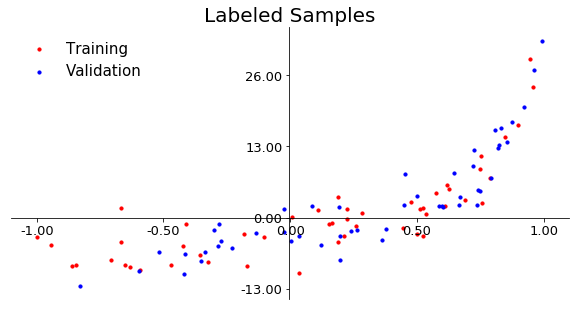

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# plot scatter points
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_train['x'], y_train, 10, 'r', label='Training')
ax.scatter(X_valid['x'], y_valid, 10, 'b', label='Validation')

# set x,y tick spacement and format
ax.xaxis.set_ticks(np.arange(X_MIN, X_MAX+0.1, 0.5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

ax.yaxis.set_ticks(np.arange(np.floor(Y_MIN), Y_MAX, 13))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

# set axis at origin
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

plt.title('Labeled Samples',fontsize=20)
plt.legend(loc='best',  prop={'size': 15}, frameon=False)

plt.show()

### 1.1 Fitting 20-degree polynimial
Given the initial feature found in X_train, 1 bias feature plus 19 other features:    

$$x^{i}, i \in [2,20]$$   
We obtain a feature vector of the the following form:

$$[0 , x, x^{2}, x^{3}, x^{4}, ... , x^{20}]$$

In [4]:
pd.options.mode.chained_assignment = None
# transform a given linear dataframe into an ith degree df
def to_ith_degree(i, df):
    if not '1' in df.columns:
        df.insert(0,'1',1)    
    for i in range(2,i+1):
        df['x^{}'.format(i)] = df['x'].apply(lambda x: np.power(x,i))
        
    return df

# turn the linear sets into 20th degree sets
X_train = to_ith_degree(20, X_train)
X_valid = to_ith_degree(20, X_valid)
X_test  = to_ith_degree(20, X_test)

X_model = pd.DataFrame(data={'x': np.linspace(X_MIN, X_MAX-0.022, 100)})
X_model = to_ith_degree(20, X_model)

display(X_train.head())


,1,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,...,x^11,x^12,x^13,x^14,x^15,x^16,x^17,x^18,x^19,x^20
0,1,-0.630483,0.397508,-0.250622,0.158013,-0.099624,0.062811,-0.039602,0.024968,-1.574193e-02,...,-6.257550e-03,3.945276e-03,-2.487428e-03,1.568280e-03,-9.887734e-04,6.234044e-04,-3.930457e-04,2.478085e-04,-1.562389e-04,9.850593e-05
1,1,-0.665856,0.443365,-0.295217,0.196572,-0.130889,0.087153,-0.058031,0.038641,-2.572908e-02,...,-1.140736e-02,7.595665e-03,-5.057621e-03,3.367648e-03,-2.242370e-03,1.493096e-03,-9.941872e-04,6.619858e-04,-4.407874e-04,2.935010e-04
2,1,0.193524,0.037451,0.007248,0.001403,0.000271,0.000053,0.000010,0.000002,3.807219e-07,...,1.425858e-08,2.759374e-09,5.340043e-10,1.033425e-10,1.999923e-11,3.870325e-12,7.489996e-13,1.449492e-13,2.805111e-14,5.428555e-15
3,1,0.792287,0.627719,0.497334,0.394031,0.312186,0.247341,0.195965,0.155260,1.230109e-01,...,7.721627e-02,6.117746e-02,4.847012e-02,3.840225e-02,3.042561e-02,2.410582e-02,1.909873e-02,1.513168e-02,1.198864e-02,9.498443e-03
4,1,0.526354,0.277049,0.145826,0.076756,0.040401,0.021265,0.011193,0.005892,3.101021e-03,...,8.591349e-04,4.522095e-04,2.380225e-04,1.252842e-04,6.594389e-05,3.470986e-05,1.826969e-05,9.616333e-06,5.061600e-06,2.664196e-06


We will now learn the weights of the model **without** regularization:

In [5]:
# Through the normal equation find the model's weights
def normal_eq_fit(X, y, l=0.0):
    # define the appropriate dimension identity matrix
    I = np.zeros((X.shape[1],X.shape[1]))
    np.fill_diagonal(I, 1.0)
    # by convention, dont regularize the bias
    I[0][0] = 0.0
    
    xTx = X.T.dot(X) + l * I
    xTx_inv = np.linalg.inv(xTx)
    xTx_inv_xT = xTx_inv.dot(X.T)
    return xTx_inv_xT.dot(y)


theta = normal_eq_fit(X_train, y_train)
print('Learned weights: \n {}'.format(theta))

Learned weights: 
 [ -3.90077042e+00  -1.56290274e+01   1.57516470e+02   1.91795804e+03
  -7.82207187e+03  -3.59000966e+04   1.28369503e+05   2.91522962e+05
  -1.01076096e+06  -1.26126005e+06   4.42712411e+06   3.18023929e+06
  -1.15571195e+07  -4.81983693e+06   1.83985937e+07   4.31746683e+06
  -1.75117953e+07  -2.10118890e+06   9.15433464e+06   4.26916056e+05
  -2.02124862e+06]


Given the learned weights we will plot the fitted model:

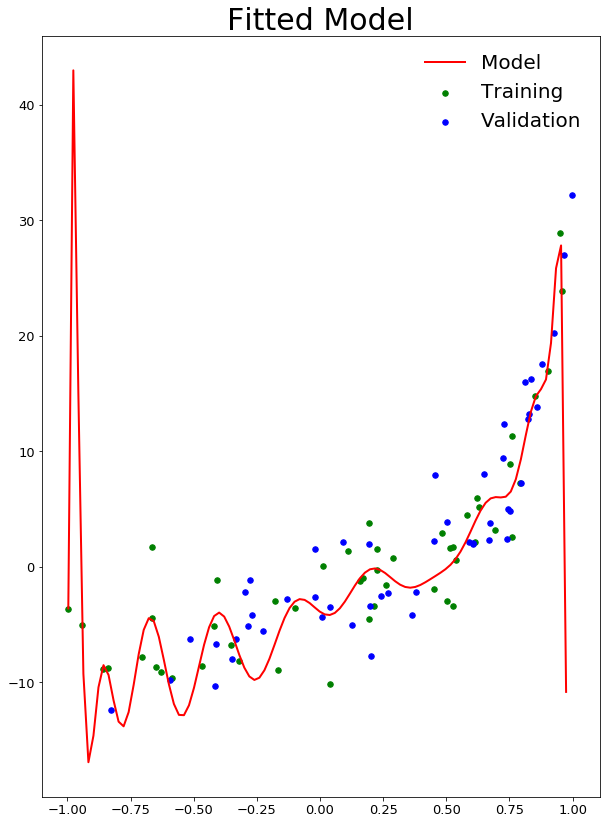

In [6]:
# plot the fitted model
def plot_fitted_model(X_train, y_train, X_valid, y_valid, X_model, y_model):
    global fig_counter
    fig, ax = plt.subplots(figsize=(10, 14))
    plt.scatter(X_train['x'], y_train, 30, color='g', label='Training')
    plt.scatter(X_valid['x'], y_valid, 30, color='b', label='Validation')
    plt.plot(X_model['x'], y_model_pred, linewidth=2, color='r', label="Model")

    plt.legend(loc="best", prop={'size': 20}, frameon=False)
    plt.title('Fitted Model', fontsize=30)
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)
    
    fig.savefig('./Figures/fig_{}.png'.format(fig_counter))
    fig_counter += 1

    plt.show()
    
    
# predict the target values for each set
y_train_pred = X_train.dot(theta)
y_valid_pred = X_valid.dot(theta)
y_model_pred = X_model.dot(theta)

plot_fitted_model(X_train, y_train, X_valid, y_valid, X_model, y_model_pred)

A few comments on the fitted model:
- While the central samples could be somewhat predicted by our model, nearby the extreme points of our training samples (i.e. x=-1 and x=1) the model is completely unreliable.
- The model displays clear signs of overfitting: the model passes exactly through many of the training points and all the learnt parameters except the bias have extremely large weights

Now we calculate the MSE for the Training and Validation sets.
Note that due to the extremely distant outlier points at the beginning and end of the diagram above, the MSE error for the Validation set is expected to be very large.

In [7]:
# calculate the MSE for training and validation sets
# MSE = mean[(A-B)^2]
MSE = lambda A,B: np.power((A - B),2).mean(axis=0)

print('Training set MSE: {:.4f}'.format(MSE(y_train, y_train_pred)))
print('Validation set MSE: {:.4f}'.format(MSE(y_valid, y_valid_pred)))

Training set MSE: 6.4748
Validation set MSE: 1430.5665


### 1.2 Add L2 regularization
We will vary lambda by 0.0005 between 0.0001 and 1:

In [8]:
train_err, valid_err = [], []

lambdas = np.arange(0.0001,1.0001,0.0005)

for l in lambdas:
    regularized_theta = normal_eq_fit(X_train, y_train, l)

    # predict the target values for each set
    y_train_pred = X_train.dot(regularized_theta)
    y_valid_pred = X_valid.dot(regularized_theta)
    y_model_pred = X_model.dot(regularized_theta)
    train_err.append(MSE(y_train, y_train_pred))
    valid_err.append(MSE(y_valid, y_valid_pred))
    

min_valid_err_idx = valid_err.index(min(valid_err))
optimal_lambda = lambdas[min_valid_err_idx]
print('Best regularization factor lambda: {}'.format(optimal_lambda))


Best regularization factor lambda: 0.0196


We will now plot the learning curve resulting for:  

$$\lambda \in [0.0001 - 1]$$

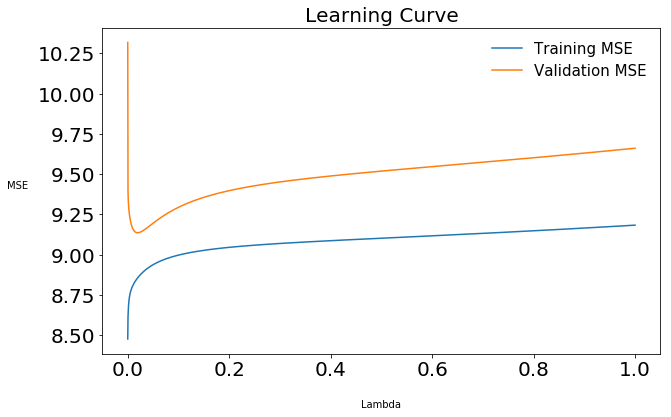

In [9]:
# plot the MSE's
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(lambdas,train_err, label='Training MSE')
ax.plot(lambdas,valid_err, label='Validation MSE')

plt.title('Learning Curve', fontsize=20)
plt.xlabel('Lambda', fontsize=10, labelpad=20)
plt.ylabel('MSE', fontsize=10, labelpad=20, rotation=0)
plt.legend(loc='best', prop={'size':15}, frameon=False)

plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

plt.show()


Now that we have found an optimal regularization coefficient, we will plot the fitted model:

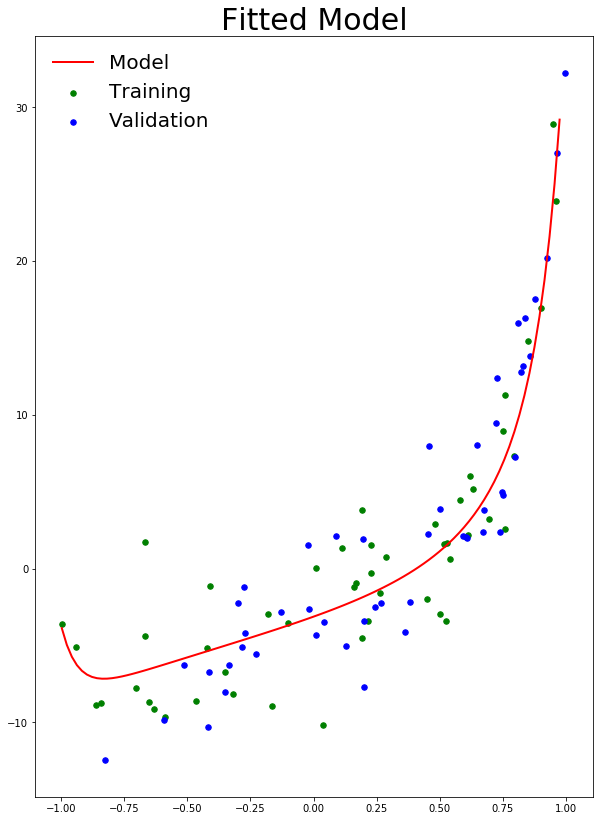

In [10]:
# plot the fitted model with the optimal weights
optimal_theta = normal_eq_fit(X_train, y_train, optimal_lambda)

y_train_pred = X_train.dot(regularized_theta)
y_valid_pred = X_valid.dot(regularized_theta)
y_test_pred = X_test.dot(regularized_theta)
y_model_pred = X_model.dot(regularized_theta)

plot_fitted_model(X_train, y_train, X_valid, y_valid, X_model, y_model_pred)

The Testing set MSE error for the optimal lambda is: 

In [11]:
test_err = MSE(y_test, y_test_pred)
print('For Lambda: {}\nTest set MSE: {}'.format(optimal_lambda, test_err))
print('Learned Weights: \n{}'.format(regularized_theta))

For Lambda: 0.0196
Test set MSE: 9.660664538419992
Learned Weights: 
[-3.12653857  5.89052927  2.32327641  3.22195356  2.73630051  2.67814137
  2.51872545  2.16048191  2.23895096  1.70375425  2.00180943  1.32710174
  1.80435456  1.02420542  1.63335947  0.78301251  1.48055689  0.59155196
  1.34196556  0.43944464  1.21578348]


## 2 Gradient Descent
### Preprocessing
Lets import the data from the CSV's into the notebook and add the bias to the X matrix:

In [12]:
column_names = ['x','y']
df2_train = pd.read_csv('./Datasets/Dataset_2_train.csv', header=None, index_col=False, names=column_names)
df2_valid = pd.read_csv('./Datasets/Dataset_2_valid.csv', header=None, index_col=False, names=column_names)
df2_test  = pd.read_csv('./Datasets/Dataset_2_test.csv',  header=None, index_col=False, names=column_names)

# shuffle the sample points
df2_train = df2_train.sample(frac=1).reset_index(drop=True)
df2_valid = df2_valid.sample(frac=1).reset_index(drop=True)
df2_test  = df2_valid.sample(frac=1).reset_index(drop=True)

X_train, y_train = df2_train[['x']], df2_train['y']
X_valid, y_valid = df2_valid[['x']], df2_valid['y']
X_test, y_test = df2_test[['x']], df2_test['y']

X_MIN, X_MAX = get_min_max([X_train, X_valid, X_test])
Y_MIN, Y_MAX = get_min_max([y_train, y_valid, y_test])

# add the bias by transforming input into a linear model
X_train = to_ith_degree(1, X_train)
X_valid = to_ith_degree(1, X_valid)
X_test  = to_ith_degree(1, X_test)

X_train.head()

,1,x
0,1,0.641568
1,1,0.548399
2,1,0.015046
3,1,0.380976
4,1,0.854617


Lets visualize the Training and Validation sets:

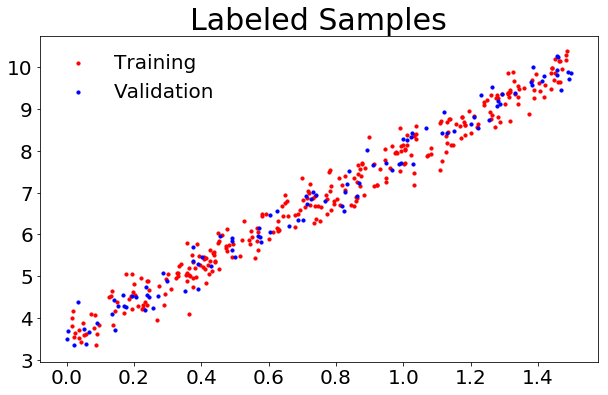

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(X_train['x'], y_train, 10, 'r', label='Training')
ax.scatter(X_valid['x'], y_valid, 10, 'b', label='Validation')

plt.title('Labeled Samples', fontsize=30)
plt.legend(loc='best', frameon=False, prop={'size':20})

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.show()


### 2.1 Online Stochastic Gradient Descent
Standard Gradient Descent's Loss function is given by the following:
$$Loss = \frac{1}{2N}\sum_{1}^{N}(\hat{y}^{(i)} - y^{(i)})$$
Online Stochastic Gradient Descent's Loss function is the sum of losses for each data point:
$$Loss = \sum_{n}loss_{n}$$  

We will now perform Online-SDG on the Training set:

In [14]:
y_hat = lambda X, theta: X.dot(theta)
error = lambda X, y, theta: y_hat(X, theta) - y

train_err, valid_err = [], []

def online_sdg_fit(alpha, theta, max_epochs, precision):
    print('Fitting with step-size (alpha): {:.6f}'.format(alpha))
    m_train = y_train.shape[0]
    m_valid = y_valid.shape[0]

    old_valid_err  = 0
    curr_valid_err = np.sum(error(X_valid, y_valid, theta) ** 2) / m_valid

    e = 0
    while abs(curr_valid_err - old_valid_err) > precision and e < max_epochs:
        # treating 1 new sample at a time
        for sample in range(y_train.shape[0]):
            X_t = X_train.iloc[sample]
            y_t = y_train.iloc[sample]

            err =  error(X_t, y_t, theta)
            theta = theta - alpha *  X_t.T * err

        old_valid_err = curr_valid_err
        e += 1

        curr_train_err = np.sum(error(X_train, y_train, theta) ** 2) / m_train
        curr_valid_err = np.sum(error(X_valid, y_valid, theta) ** 2) / m_valid
        train_err.append(curr_train_err)
        valid_err.append(curr_valid_err)

        if e % 500 == 0: 
            print('Iteration: {}\nTraining MSE: {:.4f}'.format(e,curr_train_err))
            
    return theta, e
    
    
alpha  = 10 ** -6
theta  = np.random.random((2))
max_epochs = 5000
precision  = 10 ** -4

theta, epochs = online_sdg_fit(alpha, theta, max_epochs, precision) 
    
display(theta)

Fitting with step-size (alpha): 0.000001
Iteration: 500
Training MSE: 25.5845
Iteration: 1000
Training MSE: 15.6147
Iteration: 1500
Training MSE: 9.5466
Iteration: 2000
Training MSE: 5.8532
Iteration: 2500
Training MSE: 3.6051
Iteration: 3000
Training MSE: 2.2367
Iteration: 3500
Training MSE: 1.4037
Iteration: 4000
Training MSE: 0.8965
Iteration: 4500
Training MSE: 0.5877
Iteration: 5000
Training MSE: 0.3996


1    3.478911
x    3.788376
dtype: float64

Because the above process lasts a considerable amount of minutes, for testing purposes we comment it out and store the fitted weights. If you wish to obtain these results, uncomment the cell above.

In [15]:
# theta = np.array([3.749312, 3.546370], dtype=np.float64)
# display(theta)

Let's visualize the learning curve plotted over the epochs:

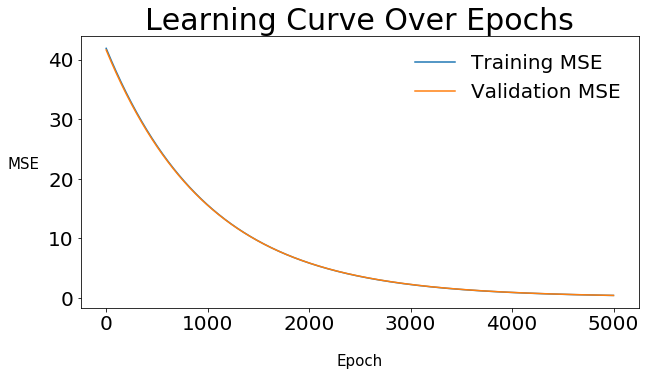

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(len(train_err)), train_err, label='Training MSE')
ax.plot(range(len(valid_err)), valid_err, label='Validation MSE')

plt.title('Learning Curve Over Epochs', fontsize=30)
plt.legend(loc='best', frameon=False, prop={'size':20})
plt.xlabel('Epoch', fontsize=15, labelpad=20)
plt.ylabel('MSE', fontsize=15, labelpad=25, rotation=0)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.show()

Lets also visualize the fitted model over both the Training and Validation sets:

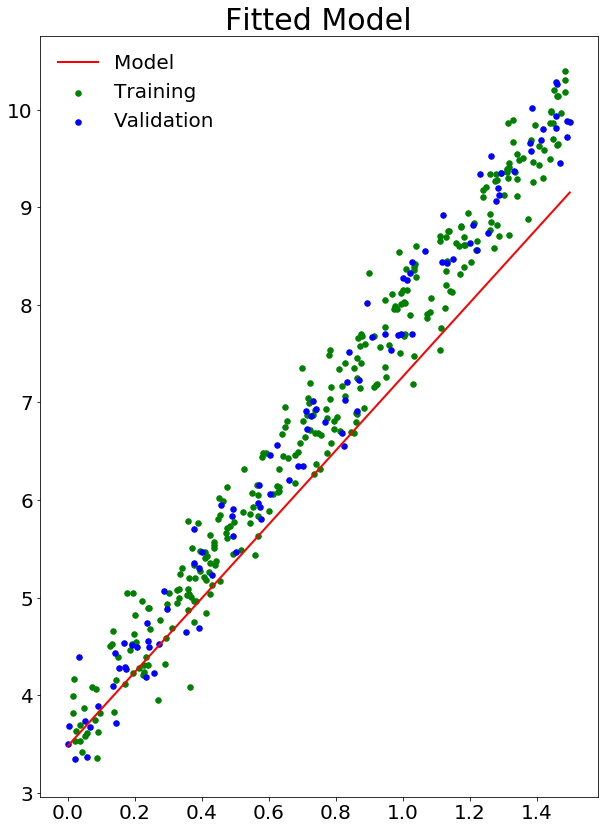

In [17]:
X_model = pd.DataFrame(data={'x': np.linspace(X_MIN, X_MAX, 100)})
X_model = to_ith_degree(1, X_model)
y_model_pred = X_model.dot(theta)

plot_fitted_model(X_train, y_train, X_valid, y_valid, X_model, y_model_pred)

### 2.2 Model Selection
We will now test different step sizes (alpha) by iterating over the Validation set.

In [18]:
max_epochs = 5000
precision  = 10 ** -4
alphas = np.linspace(10**-4, 0.03, 10)
epochs = 5000
errs = pd.DataFrame(columns=['alpha','epochs'])

for a in alphas:
    train_err, valid_err = [], []
    theta = np.random.random((2))
    theta, epochs = online_sdg_fit(a, theta, max_epochs, precision) 
    
    errs.loc[len(errs)] = [a, epochs]
        

Fitting with step-size (alpha): 0.000100
Fitting with step-size (alpha): 0.003422
Fitting with step-size (alpha): 0.006744
Fitting with step-size (alpha): 0.010067
Fitting with step-size (alpha): 0.013389
Fitting with step-size (alpha): 0.016711
Fitting with step-size (alpha): 0.020033
Fitting with step-size (alpha): 0.023356
Fitting with step-size (alpha): 0.026678
Fitting with step-size (alpha): 0.030000


Lets visualize how many epochs it took for each step-size to converge:

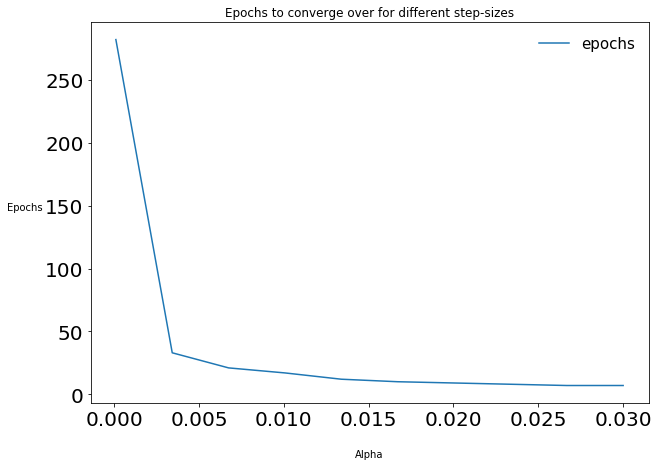

In [19]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(errs['alpha'],errs['epochs'])
plt.title('Epochs to converge over for different step-sizes')
plt.xlabel('Alpha', fontsize=10, labelpad=20, rotation=0)
plt.ylabel('Epochs', fontsize=10, labelpad=20, rotation=0)
plt.legend(loc='best', prop={'size':15}, frameon=False)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

plt.show()

Notice the _elbow_ nearby alpha = 0.003422.   
A heuristic could be to choose this point as our optimal lambda.  
I will choose a step-size of 0.03 which converged after 7 epochs.

In [20]:
errs

,alpha,epochs
0,0.000100,282.0
1,0.003422,33.0
2,0.006744,21.0
3,0.010067,17.0
4,0.013389,12.0
5,0.016711,10.0
6,0.020033,9.0
7,0.023356,8.0
8,0.026678,7.0
9,0.030000,7.0


Fitting with step-size (alpha): 0.030000


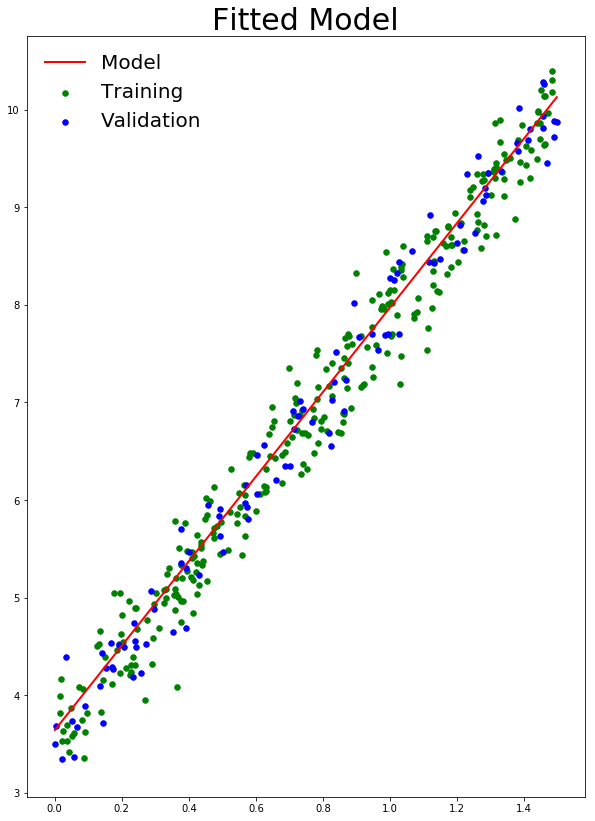

In [21]:
theta, e = online_sdg_fit(0.03, np.random.random((2)), 5000, 10 ** -4)

X_model = pd.DataFrame(data={'x': np.linspace(X_MIN, X_MAX, 100)})
X_model = to_ith_degree(1, X_model)
y_model_pred = X_model.dot(theta)

plot_fitted_model(X_train, y_train, X_valid, y_valid, X_model, y_model_pred)


The Testing set MSE for this theta is the following:

In [22]:
y_test_pred = X_test.dot(theta)
test_err = MSE(y_test, y_test_pred)
print('theta: \n{}\nalpha: {}\nTest set MSE: {}'.format(theta, 0.03, test_err))

theta: 
1    3.640759
x    4.332206
dtype: float64
alpha: 0.03
Test set MSE: 0.07759073970614919


### 2.3 Learning Visualisation
Following are the fits for each of the 7 epochs it takes to converge

Fitting with step-size (alpha): 0.010000


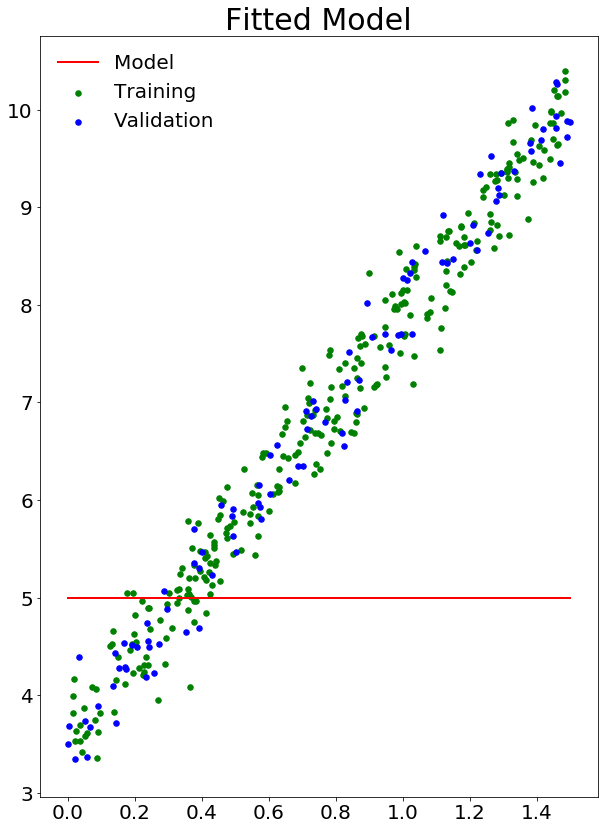

Fitting with step-size (alpha): 0.010000


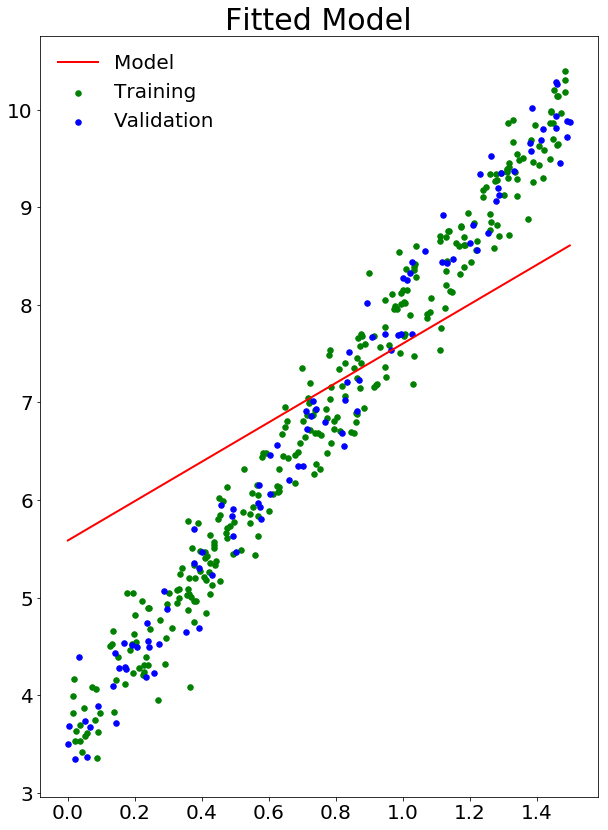

Fitting with step-size (alpha): 0.010000


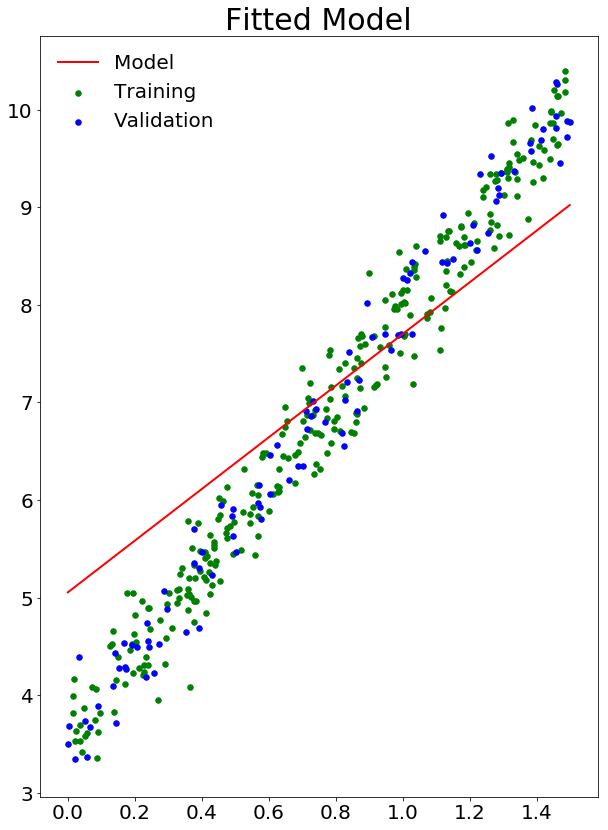

Fitting with step-size (alpha): 0.010000


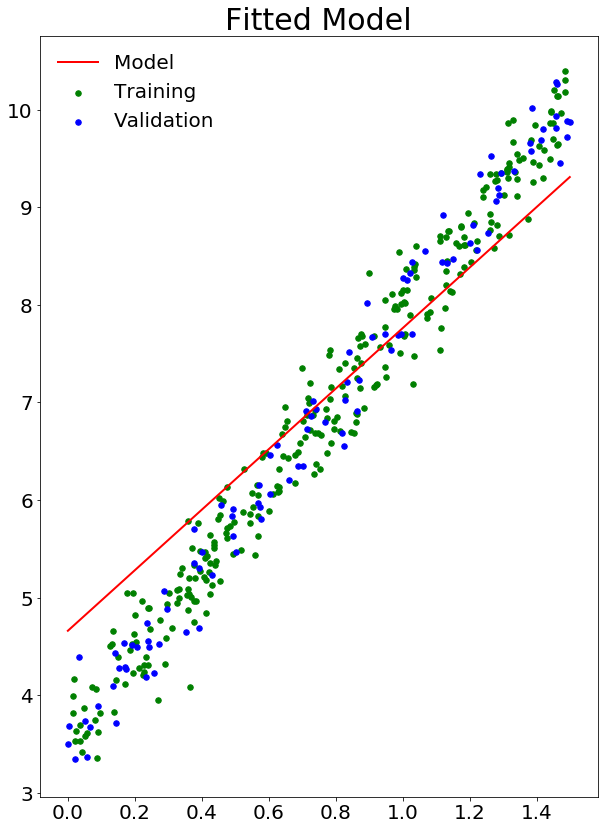

Fitting with step-size (alpha): 0.010000


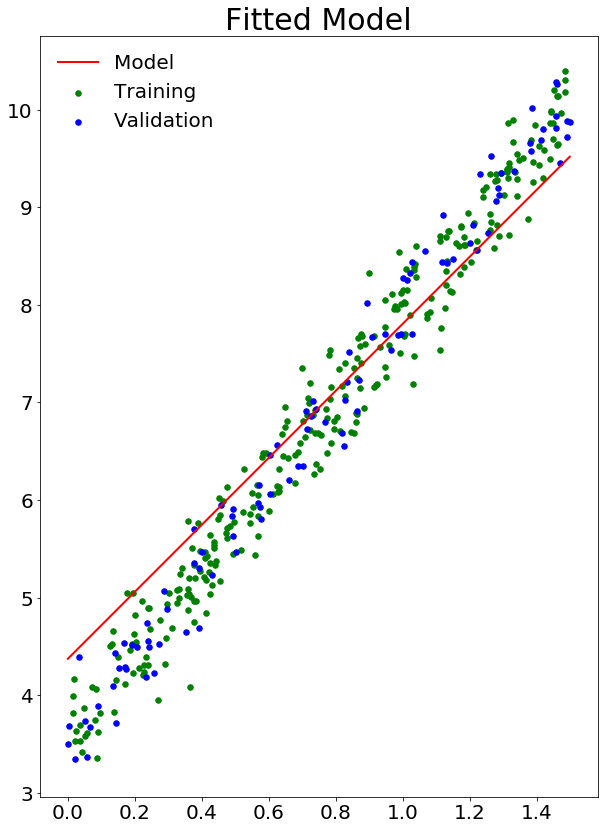

Fitting with step-size (alpha): 0.010000


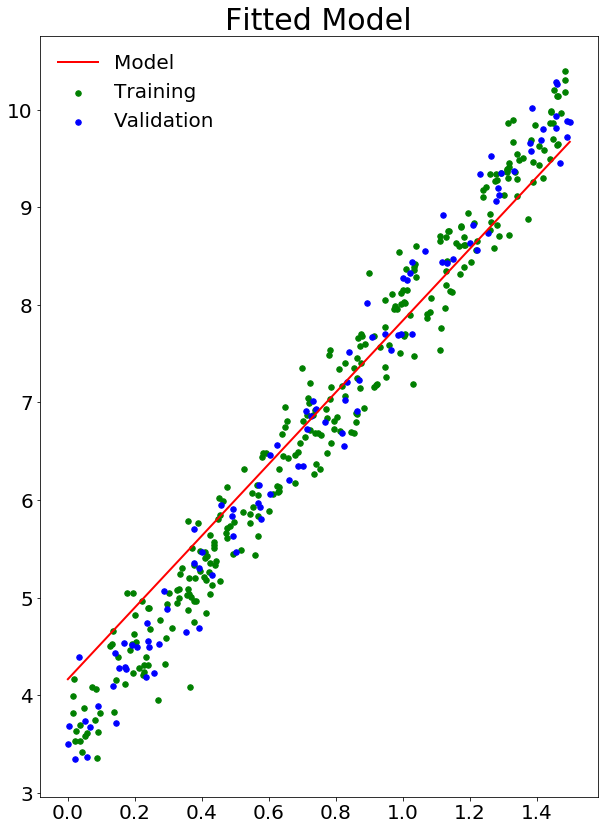

Fitting with step-size (alpha): 0.010000


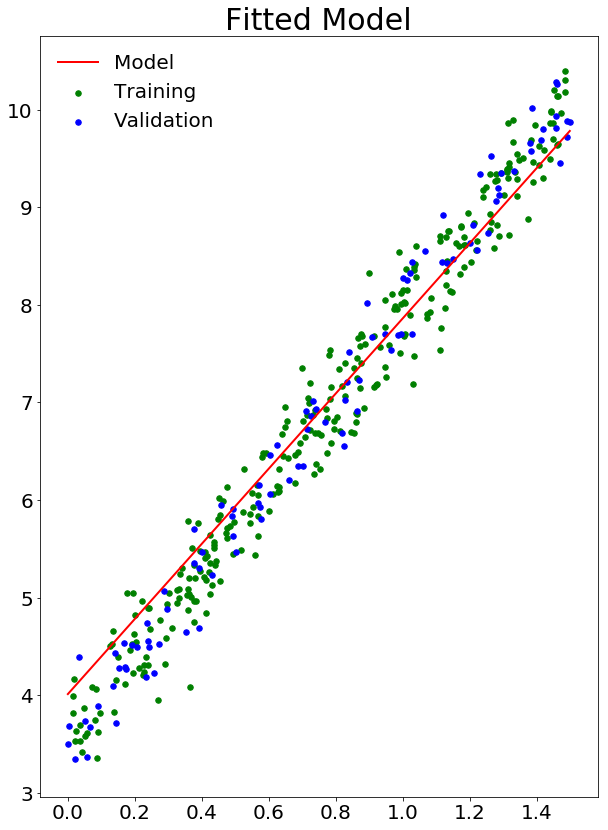

Fitting with step-size (alpha): 0.010000


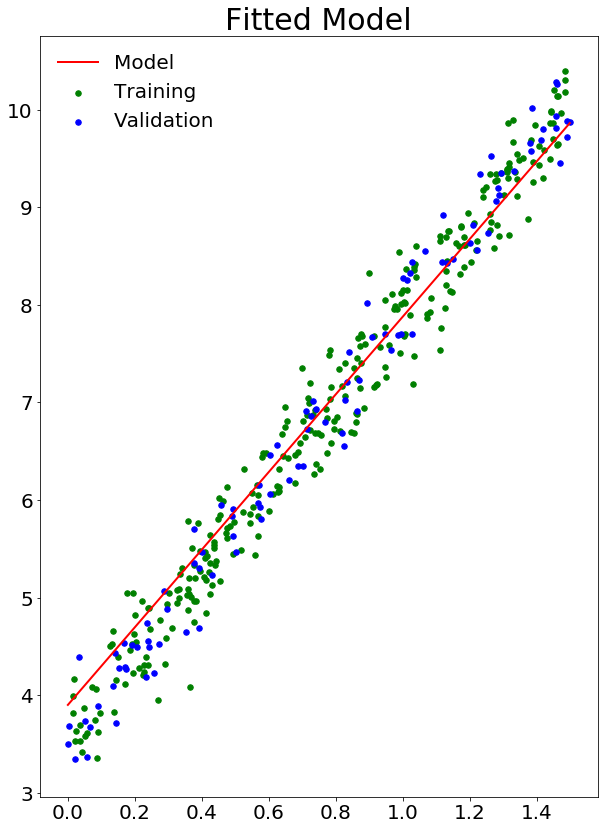

In [23]:
X_model = pd.DataFrame(data={'x': np.linspace(X_MIN, X_MAX, 100)})
X_model = to_ith_degree(1, X_model)
theta_init = np.array([5,0], dtype=np.float64)

for i in range(0,8):
    theta_init = np.array([5,0], dtype=np.float64)
    theta, _ = online_sdg_fit(0.01, theta_init, i, 10 ** -4)
    y_model_pred = X_model.dot(theta)
    plot_fitted_model(X_train, y_train, X_valid, y_valid, X_model, y_model_pred)

## K-Fold Cross Validation
### 3.1 Preprocessing
Lets import the data from the CSV's into the notebook:

In [186]:
import csv

with open('./Datasets/column_names.csv', 'r') as f:
    reader = csv.reader(f)
    column_names = list(reader)
    
df3 = pd.read_csv('./Datasets/communities_RAW.data', header=None, index_col=False, names=column_names[0])

# as stated by the prof. we can drop the first 5 columns as they are non predictive
df3.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1, inplace=True)

display(df3.head())
df3.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Using the mean to fill in missing values has 2 fundamental problems:

- Imagine a all the samples have a value in the range of [0,1] for feature x_1, except for 1 outlier sample with x_1 = 1000. the mean will be a value far from the expected values for that feature.    


- Another situation in which the mean fails to represent missing values is when the feature represents a set of specific numbers: taking the mean does not guarantee the value obtained is part of that set.

For real valued features I will choose the median of each feature as its default value.  

In [187]:
# values with NaN are ignored for operations like sum, count
# NaN values can be accessed through pandas isNull()
df3.replace('?', np.NaN, inplace=True) 

print('Total number of missing values: {}'.format(df3.isnull().sum().sum()))

df3.fillna(df3.median(), inplace=True)

print('Total number of missing values: {}'.format(df3.isnull().sum().sum()))

Total number of missing values: 36851
Total number of missing values: 0


There are some columns that were not parsed as floats:

In [188]:
print('Number of columns with dtype object: {}'.format((df3.dtypes == object).sum()))

df3 = df3.apply(pd.to_numeric)

print('Number of columns with dtype object: {}'.format((df3.dtypes == object).sum()))

Number of columns with dtype object: 23
Number of columns with dtype object: 0


We will store the clean dataset as communities.csv

In [189]:
df3.to_csv('./Datasets/communities.csv')

### 3.2 K-Fold Cross Validation
First we will make 5 80-20 bins from our clean dataset:

In [190]:
from math import floor
m = df3.shape[0]
split = floor(m * .8)

trains = []
tests = []

tests.append(df3.iloc[:400,:])
trains.append(df3.iloc[400:,:])

tests.append(df3.iloc[400:800,:])
trains.append(pd.concat([df3.iloc[:400,:], df3.iloc[800:,:]]))

tests.append(df3.iloc[800:1200,:])
trains.append(pd.concat([df3.iloc[:800,:], df3.iloc[1200:,:]]))

tests.append(df3.iloc[1200:1600,:])
trains.append(pd.concat([df3.iloc[:1200,:], df3.iloc[1600:,:]]))

tests.append(df3.iloc[1600:,:])
trains.append(df3.iloc[:1600,:])

for i, d in enumerate(tests):
    d.to_csv('./Datasets/CandC-test{}.csv'.format(i))

for i, d in enumerate(trains):
    d.to_csv('./Datasets/CandC-train{}.csv'.format(i))

Now for each of the dataset we will learn a model:

In [191]:
scores = []
thetas = []

for i, d in enumerate(trains):
    X_train = trains[i].iloc[:,0:-1]
    X_train = to_ith_degree(1, X_train)
    y_train = trains[i].iloc[:,-1]
    
    X_test = tests[i].iloc[:,0:-1]
    X_test = to_ith_degree(1, X_test)
    y_test = tests[i].iloc[:,-1]
     
    thetas.append(normal_eq_fit(X_train,y_train))
    
    scores.append(MSE(X_test.dot(thetas[i]), y_test))
    print('MST for test set {}: {}'.format(i, scores[i]))
    
print('AVG MSE for the 5 splits: {}'.format(sum(scores)/len(scores)))

MST for test set 0: 0.020111646207106326
MST for test set 1: 0.02460433001449902
MST for test set 2: 0.0171805553697446
MST for test set 3: 0.016273530588166253
MST for test set 4: 41.27244809777993
AVG MSE for the 5 splits: 8.27012363199189


We will store the learned weights in __Q3_2_k_fold_weights.txt__:

In [192]:
with open('./Datasets/Q3_2_k_fold_weights.txt', 'w') as f:
    for weights in thetas:
        f.write('{}\n\n'.format(weights))

### 3.3 Ridge Regression
With the same bins as in section 3.2 we will fit the model with L2 regularization.
We will vary lambda from 0 to 1.  
We will store the learned weights in __Q3_3_k_fold_weights.txt__.

In [193]:
scores = []
thetas = []
avg_mse = []

lambdas = np.arange(0.5,5,0.5)

with open('./Datasets/Q3_3_k_fold_weights.txt', 'w') as f:
    for i, l in enumerate(lambdas):
        scores = []
        for j in range(5):
            X_train = trains[j].iloc[:,0:-1]
            X_train = to_ith_degree(1, X_train)
            y_train = trains[j].iloc[:,[-1]]

            X_test = tests[j].iloc[:,0:-1]
            X_test = to_ith_degree(1, X_test)
            y_test = tests[j].iloc[:,[-1]]

            thetas.append(normal_eq_fit(X_train,y_train, l))
            scores.append(MSE(X_test.dot(thetas[i])[0], y_test['ViolentCrimesPerPop']))
            f.write('Fold: {}\nLambda: {}\n{}\n\n'.format(j,l,thetas[i]))

        avg_mse.append(sum(scores)/len(scores))

best_score_idx = avg_mse.index(min(avg_mse))
optimal_lambda = lambdas[best_score_idx]
print('Best regularization factor lambda: {}'.format(optimal_lambda))

print('AVG MSE for the lambdas: {}'.format(lambdas))
display(avg_mse)

Best regularization factor lambda: 0.5
AVG MSE for the lambdas: [ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]


[0.01667801671794706,
 0.016693225965552345,
 0.01669263400877757,
 0.01668700812250356,
 0.016717012252972,
 0.01678969538225828,
 0.016812960779111395,
 0.016819957640837158,
 0.01679304909818338]

Following the property of Lasso regression by which parameter with very low impact on the prediction are given weights which tend to zero, we could choose the features for which the absolute fitted weight is highest. I will perform this operations on the whole dataset, split into 80/20 for training and testing:

In [194]:
X_train = df3.iloc[:1595,0:-1]
X_train = to_ith_degree(1, X_train)
y_train = df3.iloc[:1595,-1]

X_test = df3.iloc[1595:,0:-1]
X_test = to_ith_degree(1, X_test)
y_test = df3.iloc[1595:,-1]

theta = normal_eq_fit(X_train,y_train, 0.5)

display(theta)

array([ 0.44705314, -0.02310812,  0.01035374,  0.22440461, -0.02831837,
       -0.03162985,  0.00630236,  0.09398408, -0.26281874, -0.06514553,
        0.05554383, -0.05578679,  0.04048819,  0.01575656, -0.12175138,
        0.03634143, -0.16371504,  0.07484739,  0.04874026, -0.10235893,
        0.13490689, -0.03523473, -0.14716946, -0.02588778, -0.04290156,
        0.0361686 ,  0.03947284,  0.01309677,  0.01577606, -0.14900598,
       -0.0734305 ,  0.0361248 ,  0.04973698, -0.01505641,  0.22705181,
       -0.06127772, -0.00216293,  0.07368983,  0.04347284,  0.20047196,
        0.19020224, -0.13282283, -0.05586319,  0.01805927, -0.03891041,
       -0.17898182, -0.03775198, -0.00483654,  0.03456537, -0.17829537,
       -0.09787584,  0.11363065, -0.1216721 , -0.00182903,  0.01455807,
        0.00716122, -0.02742702, -0.04277384, -0.0099938 ,  0.02704673,
        0.05603725, -0.0303788 , -0.17000281, -0.03319413, -0.11231265,
        0.22978979, -0.09264021, -0.06063554, -0.1830813 ,  0.26

In [195]:
all_features_mse = MSE(X_test.dot(theta), y_test)
print(all_features_mse)

0.01788486792897022


Now lets find out the mean and standard deviation:

In [196]:
mean= theta.mean()
stdev = theta.std()
print('mean: {}\nstdev: {}'.format(mean,stdev))

mean: 0.005535079255146668
stdev: 0.10273229289135857


Lets eliminate features 2 stdevs away from the mean:

In [197]:
# indexes of elements 2 stdevs away from mean
to_drop = np.where(abs(theta) > mean + 2 * stdev)[0]

df3.drop(df3.columns[to_drop], axis=1, inplace=True)

print('After deleting outlier features we have: {} features'.format(len(df3.columns)))

After deleting outlier features we have: 116 features


In [198]:
X_train = df3.iloc[:1595,0:-1]
X_train = to_ith_degree(1, X_train)
y_train = df3.iloc[:1595,-1]

X_test = df3.iloc[1595:,0:-1]
X_test = to_ith_degree(1, X_test)
y_test = df3.iloc[1595:,-1]

theta = normal_eq_fit(X_train,y_train, 0.5)

selected_features_mse = MSE(X_test.dot(theta), y_test)
print(selected_features_mse)

0.017781717814839452


We saw a prediction improvement of:

In [199]:
improvement = (all_features_mse - selected_features_mse) / all_features_mse * 100
print('A negligable improvement of {:.4f}% is observed with the feature selection heuristic we chose.'.format(improvement))

A negligable improvement of 0.5767% is observed with the feature selection heuristic we chose.
